In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
columns_name=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep="\t",names=columns_name)

# Basic Data Analysis 

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
df['user_id'].value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
147     20
19      20
572     20
636     20
895     20
Name: user_id, Length: 943, dtype: int64

In [7]:
df['item_id'].value_counts()

50      583
258     509
100     508
181     507
294     485
       ... 
1648      1
1571      1
1329      1
1457      1
1663      1
Name: item_id, Length: 1682, dtype: int64

In [8]:
df['user_id'].nunique()

943

In [9]:
df['user_id'].nunique()

943

In [10]:
movies_title=pd.read_csv('u.item',sep="\|",header=None)

In [11]:
movies_title.shape

(1682, 24)

In [12]:
movies_titles=movies_title[[0,1]]
movies_titles.columns=["item_id","title"]
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df=pd.merge(df,movies_titles,on="item_id")

In [14]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [15]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [16]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [17]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [18]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
df['title'].value_counts()

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
                                   ... 
Fear, The (1995)                      1
Shadows (Cienie) (1988)               1
Other Voices, Other Rooms (1997)      1
Big One, The (1997)                   1
Sleepover (1995)                      1
Name: title, Length: 1664, dtype: int64

In [20]:
df['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [21]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

# Basiv visualizing data

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:>

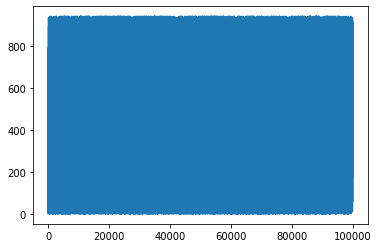

In [23]:
df["user_id"].plot()

In [24]:
df.groupby('title')['rating'].value_counts()

title                               rating
'Til There Was You (1997)           2         3
                                    3         3
                                    1         2
                                    4         1
1-900 (1994)                        1         2
                                             ..
unknown                             4         4
                                    3         3
                                    1         1
                                    5         1
Á köldum klaka (Cold Fever) (1994)  3         1
Name: rating, Length: 6662, dtype: int64

In [25]:
import seaborn as sns

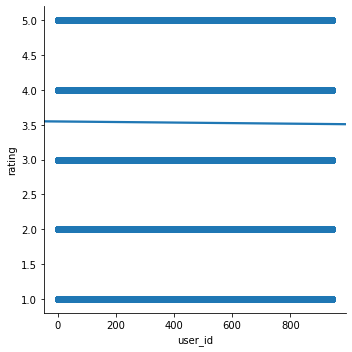

In [26]:
sns.lmplot(x='user_id', y='rating', data=df)

<AxesSubplot:xlabel='count', ylabel='item_id'>

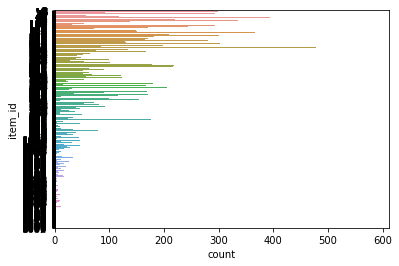

In [27]:
sns.countplot(y='item_id',data=df)

<AxesSubplot:xlabel='title'>

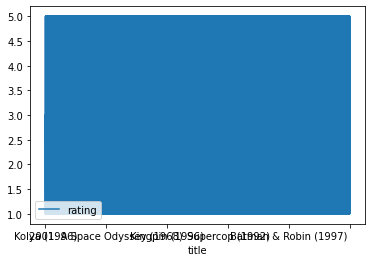

In [28]:
df.plot(x='title', y='rating', kind='line')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Create the recommendar System

In [30]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [31]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [33]:
spd_moviemat=df.pivot_table(index="user_id",columns="title",values="rating")

In [34]:
spd_moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [35]:
starwars_user_ratings=spd_moviemat['Star Wars (1977)']

In [36]:
starwars_user_ratings.head(20)

user_id
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
11    NaN
12    4.0
13    5.0
14    5.0
15    5.0
16    NaN
17    NaN
18    4.0
19    NaN
20    3.0
Name: Star Wars (1977), dtype: float64

In [38]:
similar_to_starwars=spd_moviemat.corrwith(starwars_user_ratings)

In [39]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [40]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [41]:
corr_starwars.dropna(inplace=True)

In [42]:
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [43]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [45]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [46]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [47]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [48]:
corr_starwars

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [49]:
corr_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [51]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation',ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [52]:
def predict_mymovies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of ratings'])
    
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('correlation',ascending=False)
    
    return predictions

In [55]:
predict_my_movie=predict_mymovies("Titanic (1997)")

In [56]:
predict_my_movie.head()

,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


In [58]:
predict_my_movie=predict_mymovies("Empire Strikes Back, The (1980)")

In [59]:
predict_my_movie

,correlation,num of ratings
title,,
"Empire Strikes Back, The (1980)",1.000000,367
Star Wars (1977),0.747981,583
Return of the Jedi (1983),0.721229,507
Raiders of the Lost Ark (1981),0.538659,420
"Philadelphia Story, The (1940)",0.482151,104
...,...,...
Benny & Joon (1993),-0.162069,102
Multiplicity (1996),-0.165313,134
Kiss the Girls (1997),-0.165721,143


In [60]:
predict_my_movie=predict_mymovies("Kiss the Girls (1997)")
predict_my_movie

,correlation,num of ratings
title,,
Kiss the Girls (1997),1.000000,143
"River Wild, The (1994)",0.744500,146
Cold Comfort Farm (1995),0.731265,125
True Lies (1994),0.668315,208
"Craft, The (1996)",0.627878,104
...,...,...
Harold and Maude (1971),-0.343105,121
Quiz Show (1994),-0.345362,175
Hoop Dreams (1994),-0.386203,117
